In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
%matplotlib inline


In [163]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of
          samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, 
                              size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) 
                        >= 0.0, 1, -1)



In [164]:
#functions
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')
        
        

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [165]:
df = pd.read_csv('iris.csv', header=None)

IA = df.iloc[:,:].values
for i_ in range(0,len(df),10):
    print(i_, IA[i_,:])


# Setup Iris feature lablels

IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])


0 [5.1 3.5 1.4 0.2 'Iris-setosa']
10 [5.4 3.7 1.5 0.2 'Iris-setosa']
20 [5.4 3.4 1.7 0.2 'Iris-setosa']
30 [4.8 3.1 1.6 0.2 'Iris-setosa']
40 [5.0 3.5 1.3 0.3 'Iris-setosa']
50 [7.0 3.2 4.7 1.4 'Iris-versicolor']
60 [5.0 2.0 3.5 1.0 'Iris-versicolor']
70 [5.9 3.2 4.8 1.8 'Iris-versicolor']
80 [5.5 2.4 3.8 1.1 'Iris-versicolor']
90 [5.5 2.6 4.4 1.2 'Iris-versicolor']
100 [6.3 3.3 6.0 2.5 'Iris-virginica']
110 [6.5 3.2 5.1 2.0 'Iris-virginica']
120 [6.9 3.2 5.7 2.3 'Iris-virginica']
130 [7.4 2.8 6.1 1.9 'Iris-virginica']
140 [6.7 3.1 5.6 2.4 'Iris-virginica']
sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


In [166]:

Rows_colums = df.iloc[:,:].values

#filters 
for i_ in range(0,len(df),10):
    print(i_, Rows_colums[i_,:])




0 [5.1 3.5 1.4 0.2 'Iris-setosa']
10 [5.4 3.7 1.5 0.2 'Iris-setosa']
20 [5.4 3.4 1.7 0.2 'Iris-setosa']
30 [4.8 3.1 1.6 0.2 'Iris-setosa']
40 [5.0 3.5 1.3 0.3 'Iris-setosa']
50 [7.0 3.2 4.7 1.4 'Iris-versicolor']
60 [5.0 2.0 3.5 1.0 'Iris-versicolor']
70 [5.9 3.2 4.8 1.8 'Iris-versicolor']
80 [5.5 2.4 3.8 1.1 'Iris-versicolor']
90 [5.5 2.6 4.4 1.2 'Iris-versicolor']
100 [6.3 3.3 6.0 2.5 'Iris-virginica']
110 [6.5 3.2 5.1 2.0 'Iris-virginica']
120 [6.9 3.2 5.7 2.3 'Iris-virginica']
130 [7.4 2.8 6.1 1.9 'Iris-virginica']
140 [6.7 3.1 5.6 2.4 'Iris-virginica']


In [167]:
# get Iris classifications


classifications = np.unique(Rows_colums[:,4])
plt_colors = ('red', 'blue', 'green')
plt_Markers = ('o', 'x', '*')
for i in range(0,3):
    print(classifications[i], plt_colors[i], plt_Markers[i])

Iris-setosa red o
Iris-versicolor blue x
Iris-virginica green *


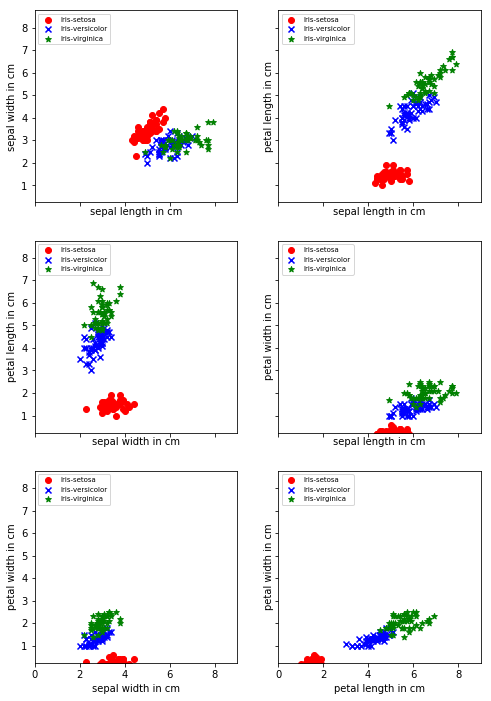

In [168]:
plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)

Cl = Rows_colums[:,4]
i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    yF = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        xF = IrisF[j]
        ax[k1,k2].scatter(x=Rows_colums[Cl == classifications[0], j], y=Rows_colums[Cl == classifications[0], i], color=plt_colors[0], marker=plt_Markers[0], label=classifications[0])
        ax[k1,k2].scatter(x=Rows_colums[Cl == classifications[1], j], y=Rows_colums[Cl == classifications[1], i], color=plt_colors[1], marker=plt_Markers[1], label=classifications[1])
        ax[k1,k2].scatter(x=Rows_colums[Cl == classifications[2], j], y=Rows_colums[Cl == classifications[2], i], color=plt_colors[2], marker=plt_Markers[2], label=classifications[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim([0,9])
        ax[k1,k2].set_ylim([0,9])
        ax[k1,k2].set_xlabel(xF)
        ax[k1,k2].set_ylabel(yF)
        ax[k1,k2].legend(loc='upper left', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    


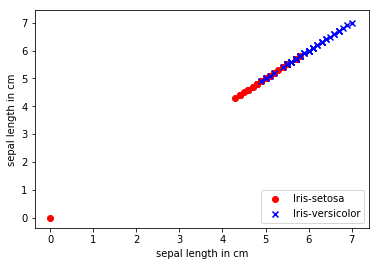

0.485148514851


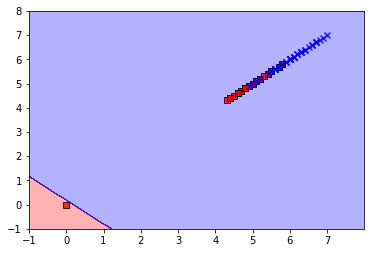

In [190]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
classification_Setosa_versicolor = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
feature = np.array([0,0])#Do every type of combination

i = 0
numCl = 1
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        numCl += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:
        numCl += 1    
    i += 1  
    
y = np.zeros((numCl))
X = np.zeros((numCl,2))#size of dinmensions
#three or more increase
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        
        y[j] = 0
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]#add another feature
        #when 3 or more updat this
        j += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:      
        y[j] = 1
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]
        j += 1
    i += 1

plt.close('all')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color=plt_colors[classification_Setosa_versicolor[0]], marker=plt_Markers[classification_Setosa_versicolor[0]], label=classifications[classification_Setosa_versicolor[0]])
plt.scatter(x = X [y == 1, 0], y = X[y == 1, 1], color=plt_colors[classification_Setosa_versicolor[1]], marker=plt_Markers[classification_Setosa_versicolor[1]], label=classifications[classification_Setosa_versicolor[1]])
plt.xlabel(IrisF[feature[0]])
plt.ylabel(IrisF[feature[1]])
plt.legend(loc='lower right', fontsize='medium')
plt.show()

ada = AdalineGD(n_iter=100,eta=.0001).fit(X,y)
plot_decision_regions(X,y, classifier=ada, resolution=0.02)

print(abs(sum(ada.predict(X) - y)  / len( y)))


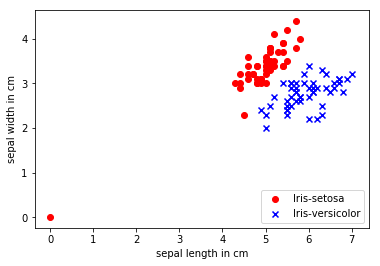

In [201]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
classification_Setosa_versicolor = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
feature = np.array([0,1])#Do every type of combination
i = 0
numCl = 1
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        numCl += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:
        numCl += 1    
    i += 1  
    
y = np.zeros((numCl))
X = np.zeros((numCl,2))#size of dinmensions
#three or more increase
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        
        y[j] = 0
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]#add another feature
        #when 3 or more updat this
        j += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:      
        y[j] = 1
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]
        j += 1
    i += 1

plt.close('all')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color=plt_colors[classification_Setosa_versicolor[0]], marker=plt_Markers[classification_Setosa_versicolor[0]], label=classifications[classification_Setosa_versicolor[0]])
plt.scatter(x = X [y == 1, 0], y = X[y == 1, 1], color=plt_colors[classification_Setosa_versicolor[1]], marker=plt_Markers[classification_Setosa_versicolor[1]], label=classifications[classification_Setosa_versicolor[1]])
plt.xlabel(IrisF[feature[0]])
plt.ylabel(IrisF[feature[1]])
plt.legend(loc='lower right', fontsize='medium')
plt.show()




0.1485148514851485


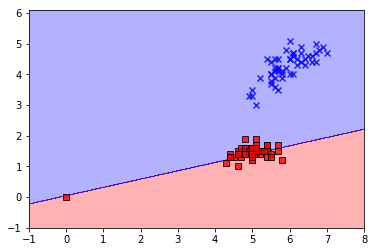

In [269]:
ada1 = AdalineGD(n_iter=1000,eta=.0001).fit(X,y)
plot_decision_regions(X,y, classifier=ada1, resolution=0.01)
A1 = ada1.predict(X) - y
print(abs(mean(A1)))

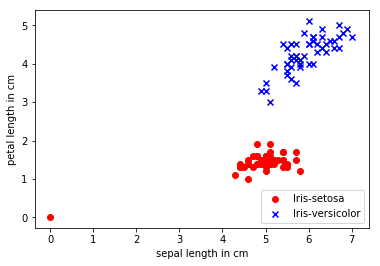

/Users/camilosalazar/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in square
/Users/camilosalazar/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater_equal


1.49504950495


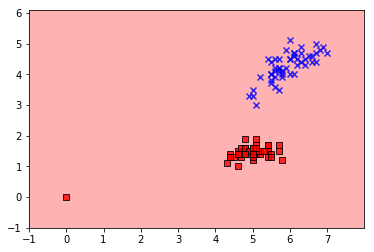

In [268]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
classification_Setosa_versicolor = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
feature = np.array([0,2])#Do every type of combination

i = 0
numCl = 1
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        numCl += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:
        numCl += 1    
    i += 1  
    
y = np.zeros((numCl))
X = np.zeros((numCl,2))#size of dinmensions
#three or more increase
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        
        y[j] = 0
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]#add another feature
        #when 3 or more updat this
        j += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:      
        y[j] = 1
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]
        j += 1
        
    i += 1

plt.close('all')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color=plt_colors[classification_Setosa_versicolor[0]], marker=plt_Markers[classification_Setosa_versicolor[0]], label=classifications[classification_Setosa_versicolor[0]])
plt.scatter(x = X [y == 1, 0], y = X[y == 1, 1], color=plt_colors[classification_Setosa_versicolor[1]], marker=plt_Markers[classification_Setosa_versicolor[1]], label=classifications[classification_Setosa_versicolor[1]])
plt.xlabel(IrisF[feature[0]])
plt.ylabel(IrisF[feature[1]])
plt.legend(loc='lower right', fontsize='medium')
plt.show()

#training


ada2 = AdalineGD(n_iter=1000,eta=.01).fit(X,y)
plot_decision_regions(X,y, classifier=ada2, resolution=0.02)
#gives me my precentage
print(abs(sum(ada2.predict(X) - y)  / len( y)))


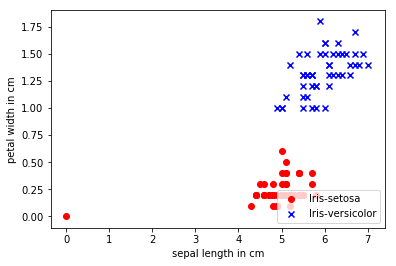

0.366336633663


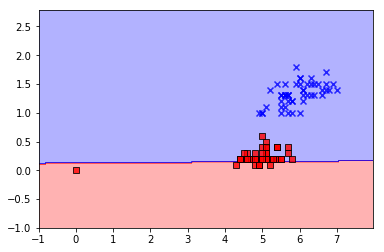

In [265]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
classification_Setosa_versicolor = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
feature = np.array([0,3])#Do every type of combination

i = 0
numCl = 1
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        numCl += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:
        numCl += 1    
    i += 1  
    
y = np.zeros((numCl))
X = np.zeros((numCl,2))#size of dinmensions
#three or more increase
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        
        y[j] = 0
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]#add another feature
        #when 3 or more updat this
        j += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:      
        y[j] = 1
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]
        j += 1
    i += 1

plt.close('all')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color=plt_colors[classification_Setosa_versicolor[0]], marker=plt_Markers[classification_Setosa_versicolor[0]], label=classifications[classification_Setosa_versicolor[0]])
plt.scatter(x = X [y == 1, 0], y = X[y == 1, 1], color=plt_colors[classification_Setosa_versicolor[1]], marker=plt_Markers[classification_Setosa_versicolor[1]], label=classifications[classification_Setosa_versicolor[1]])
plt.xlabel(IrisF[feature[0]])
plt.ylabel(IrisF[feature[1]])
plt.legend(loc='lower right', fontsize='medium')
plt.show()


#training


ada3 = AdalineGD(n_iter=1000,eta=.0001).fit(X,y)
plot_decision_regions(X,y, classifier=ada3, resolution=0.02)
print(abs(sum(ada3.predict(X) - y)  / len( y)))#gives me my precentage

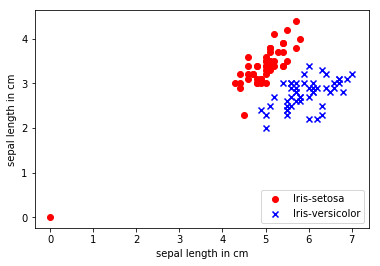

1.495049504950495


/Users/camilosalazar/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in square
/Users/camilosalazar/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater_equal


In [260]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
classification_Setosa_versicolor = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
feature = np.array([0,1,0])#Do every type of combination

i = 0
numCl = 1
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        numCl += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:
        numCl += 1  
    i += 1  
    
y = np.zeros((numCl))
X = np.zeros((numCl,3))#size of dimensions to 3
#three or more increase
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        
        y[j] = 0
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]#add another feature
        X[j,2] = Rows_colums[i,feature[2]]

        #when 3 or more updat this
        j += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:      
        y[j] = 1
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]
        X[j,2] = Rows_colums[i,feature[2]]

        j += 1
    i += 1

plt.close('all')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color=plt_colors[classification_Setosa_versicolor[0]], marker=plt_Markers[classification_Setosa_versicolor[0]], label=classifications[classification_Setosa_versicolor[0]])
plt.scatter(x = X [y == 1, 0], y = X[y == 1, 1], color=plt_colors[classification_Setosa_versicolor[1]], marker=plt_Markers[classification_Setosa_versicolor[1]], label=classifications[classification_Setosa_versicolor[1]])

plt.xlabel(IrisF[feature[0]])
plt.ylabel(IrisF[feature[1]])
plt.ylabel(IrisF[feature[2]])

plt.legend(loc='lower right', fontsize='medium')
plt.show()
#training
ada4 = AdalineGD(n_iter=1000,eta=.01).fit(X,y)
#plot_decision_regions(X,y, classifier=ada4, resolution=0.02)
precentage = ada5.predict(X) - y
print(abs(mean(precentage)))
#gives me my precentage

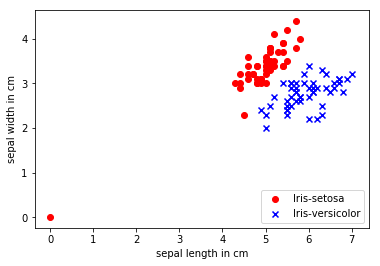

1.495049504950495


/Users/camilosalazar/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in square
/Users/camilosalazar/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater_equal


'\nB = len(ada5.predict(X) - y)\nprint(abs(A  / B))\n#gives me my precentage\n#print(len(ada5.predict(X) - y))\nnp.mean(A,B)\n'

In [257]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
classification_Setosa_versicolor = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
feature = np.array([0,1,1])#Do every type of combination

i = 0
numCl = 1
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        numCl += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:
        numCl += 1  
    i += 1  
    
y = np.zeros((numCl))
X = np.zeros((numCl,3))#size of dimensions to 3
#three or more increase
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        y[j] = 0
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]#add another feature
        X[j,2] = Rows_colums[i,feature[2]]#add another feature
        
        #when 3 or more updat this
        j += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:      
        y[j] = 1
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]
        X[j,2] = Rows_colums[i,feature[2]]
  
        j += 1
    i += 1

plt.close('all')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color=plt_colors[classification_Setosa_versicolor[0]], marker=plt_Markers[classification_Setosa_versicolor[0]], label=classifications[classification_Setosa_versicolor[0]])
plt.scatter(x = X [y == 1, 0], y = X[y == 1, 1], color=plt_colors[classification_Setosa_versicolor[1]], marker=plt_Markers[classification_Setosa_versicolor[1]], label=classifications[classification_Setosa_versicolor[1]])

plt.xlabel(IrisF[feature[0]])
plt.ylabel(IrisF[feature[1]])
plt.ylabel(IrisF[feature[2]])

plt.legend(loc='lower right', fontsize='medium')
plt.show()
#training
ada5 = AdalineGD(n_iter=1000,eta=.0001).fit(X,y)
#plot_decision_regions(X,y, classifier=ada5, resolution=0.02)


A = ada5.predict(X) - y
print(abs(mean(A)))



"""
B = len(ada5.predict(X) - y)
print(abs(A  / B))
#gives me my precentage
#print(len(ada5.predict(X) - y))
np.mean(A,B)
"""




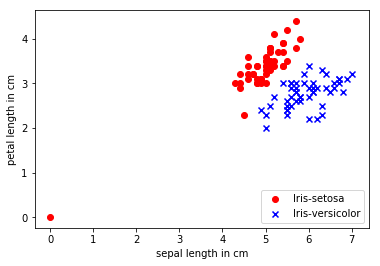

0.227722772277


In [254]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
classification_Setosa_versicolor = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
feature = np.array([0,1,2])#Do every type of combination

i = 0
numCl = 1
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        numCl += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:
        numCl += 1  
    i += 1  
    
y = np.zeros((numCl))
X = np.zeros((numCl,2))#size of dimensions to 3
#three or more increase
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        
        y[j] = 0
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]#add another feature
        

        #when 3 or more updat this
        j += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:      
        y[j] = 1
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]

        j += 1
    i += 1

plt.close('all')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color=plt_colors[classification_Setosa_versicolor[0]], marker=plt_Markers[classification_Setosa_versicolor[0]], label=classifications[classification_Setosa_versicolor[0]])
plt.scatter(x = X [y == 1, 0], y = X[y == 1, 1], color=plt_colors[classification_Setosa_versicolor[1]], marker=plt_Markers[classification_Setosa_versicolor[1]], label=classifications[classification_Setosa_versicolor[1]])

plt.xlabel(IrisF[feature[0]])
plt.ylabel(IrisF[feature[1]])
plt.ylabel(IrisF[feature[2]])

plt.legend(loc='lower right', fontsize='medium')
plt.show()
#training
ada6 = AdalineGD(n_iter=1000,eta=.0001).fit(X,y)
#plot_decision_regions(X,y, classifier=ada1, resolution=0.02)
print(abs(sum(ada6.predict(X) - y)  / len( y)))
#gives me my precentage

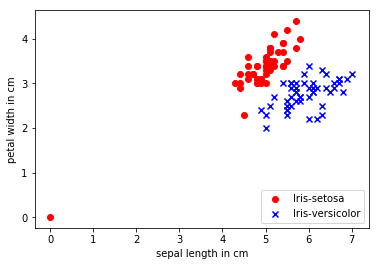

0.227722772277


In [279]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
classification_Setosa_versicolor = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
feature = np.array([0,1,3])#Do every type of combination

i = 0
numCl = 1
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        numCl += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:
        numCl += 1
    i += 1  
    
y = np.zeros((numCl))
X = np.zeros((numCl,2))#size of dinmensions
#three or more increase
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        
        y[j] = 0
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]#add another feature
#when i add more dimensions it doesn't work but when I leave it with 2 it works?       
        j += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:      
        y[j] = 1
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]
        j += 1
    i += 1         
                             
plt.close('all')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color=plt_colors[classification_Setosa_versicolor[0]], marker=plt_Markers[classification_Setosa_versicolor[0]], label=classifications[classification_Setosa_versicolor[0]])
plt.scatter(x = X [y == 1, 0], y = X[y == 1, 1], color=plt_colors[classification_Setosa_versicolor[1]], marker=plt_Markers[classification_Setosa_versicolor[1]], label=classifications[classification_Setosa_versicolor[1]])
plt.xlabel(IrisF[feature[0]])
plt.ylabel(IrisF[feature[1]])
plt.ylabel(IrisF[feature[2]])
plt.legend(loc='lower right', fontsize='medium')
plt.show()
 
    
#training
    
ada7 = AdalineGD(n_iter=1000,eta=.0001).fit(X,y)
#plot_decision_regions(X,y, classifier=ada1, resolution=0.02)
print(abs(sum(ada7.predict(X) - y)  / len( y)))#gives me my precentage



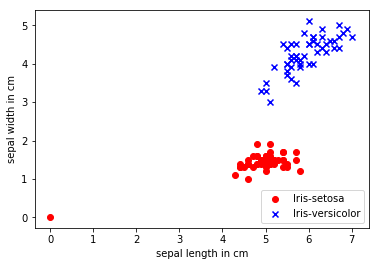

0.148514851485


In [297]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
classification_Setosa_versicolor = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
feature = np.array([0,2,1])#Do every type of combination

i = 0
numCl = 1
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        numCl += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:
        numCl += 1
    i += 1  
    
y = np.zeros((numCl))
X = np.zeros((numCl,2))#size of dinmensions
#three or more increase
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        
        y[j] = 0
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]#add another feature
#when i add more dimensions it doesn't work but when I leave it with 2 it works?       
        j += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:      
        y[j] = 1
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]
        j += 1
    i += 1         
                             
plt.close('all')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color=plt_colors[classification_Setosa_versicolor[0]], marker=plt_Markers[classification_Setosa_versicolor[0]], label=classifications[classification_Setosa_versicolor[0]])
plt.scatter(x = X [y == 1, 0], y = X[y == 1, 1], color=plt_colors[classification_Setosa_versicolor[1]], marker=plt_Markers[classification_Setosa_versicolor[1]], label=classifications[classification_Setosa_versicolor[1]])
plt.xlabel(IrisF[feature[0]])
plt.ylabel(IrisF[feature[1]])
plt.ylabel(IrisF[feature[2]])
plt.legend(loc='lower right', fontsize='medium')
plt.show()
 
    
#training
    
ada7 = AdalineGD(n_iter=1000,eta=.0001).fit(X,y)
#plot_decision_regions(X,y, classifier=ada1, resolution=0.02)
print(abs(sum(ada7.predict(X) - y)  / len( y)))#gives me my precentage


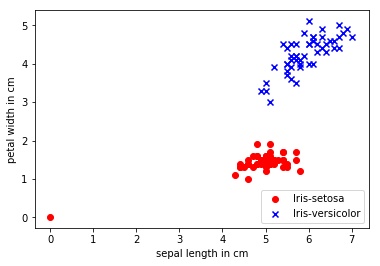

0.148514851485


In [308]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
classification_Setosa_versicolor = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
feature = np.array([0,2,3])#Do every type of combination

i = 0
numCl = 1
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        numCl += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:
        numCl += 1
    i += 1  
    
y = np.zeros((numCl))
X = np.zeros((numCl,2))#size of dinmensions
#three or more increase
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        
        y[j] = 0
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]#add another feature
#when i add more dimensions it doesn't work but when I leave it with 2 it works?       
        j += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:      
        y[j] = 1
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]
        j += 1
    i += 1         
                             
plt.close('all')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color=plt_colors[classification_Setosa_versicolor[0]], marker=plt_Markers[classification_Setosa_versicolor[0]], label=classifications[classification_Setosa_versicolor[0]])
plt.scatter(x = X [y == 1, 0], y = X[y == 1, 1], color=plt_colors[classification_Setosa_versicolor[1]], marker=plt_Markers[classification_Setosa_versicolor[1]], label=classifications[classification_Setosa_versicolor[1]])
plt.xlabel(IrisF[feature[0]])
plt.ylabel(IrisF[feature[1]])
plt.ylabel(IrisF[feature[2]])
plt.legend(loc='lower right', fontsize='medium')
plt.show()
 
    
#training
    
ada7 = AdalineGD(n_iter=1000,eta=.0001).fit(X,y)
#plot_decision_regions(X,y, classifier=ada1, resolution=0.02)
print(abs(sum(ada7.predict(X) - y)  / len( y)))#gives me my precentage

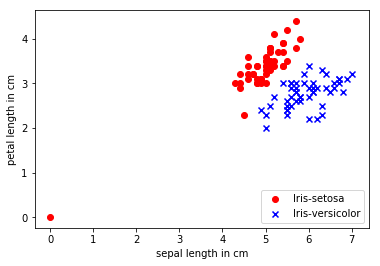

1.49504950495


In [313]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
classification_Setosa_versicolor = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
feature = np.array([0,1,2,3])#Do every type of combination

i = 0
numCl = 1
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        numCl += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:
        numCl += 1
    i += 1  
    
y = np.zeros((numCl))
X = np.zeros((numCl,4))#size of dinmensions
#three or more increase
i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == classifications[classification_Setosa_versicolor[0]]:
        
        y[j] = 0
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]#add another feature
        X[j,2] = Rows_colums[i,feature[2]]
        X[j,3] = Rows_colums[i,feature[3]]
#when i add more dimensions it doesn't work but when I leave it with 2 it works?       
        j += 1
    if Cl[i] == classifications[classification_Setosa_versicolor[1]]:      
        y[j] = 1
        X[j,0] = Rows_colums[i,feature[0]]
        X[j,1] = Rows_colums[i,feature[1]]
        X[j,2] = Rows_colums[i,feature[2]]
        X[j,3] = Rows_colums[i,feature[3]]


        j += 1
    i += 1         
                             
plt.close('all')
plt.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color=plt_colors[classification_Setosa_versicolor[0]], marker=plt_Markers[classification_Setosa_versicolor[0]], label=classifications[classification_Setosa_versicolor[0]])
plt.scatter(x = X [y == 1, 0], y = X[y == 1, 1], color=plt_colors[classification_Setosa_versicolor[1]], marker=plt_Markers[classification_Setosa_versicolor[1]], label=classifications[classification_Setosa_versicolor[1]])
plt.xlabel(IrisF[feature[0]])
plt.ylabel(IrisF[feature[1]])
plt.ylabel(IrisF[feature[2]])
plt.legend(loc='lower right', fontsize='medium')
plt.show()
 
    
#training
    
ada8 = AdalineGD(n_iter=50,eta=.001).fit(X,y)
#plot_decision_regions(X,y, classifier=ada1, resolution=0.02)
print(abs(sum(ada8.predict(X) - y)  / len( y)))#gives me my precentage


Summarize your results (i.e, what’ s the best
accuracy you can obtain for each of the 11 cases
you considered) in a table?

Discuss your findings. Does using more
dimensions help when trying to classify the data in
this dataset?

During the project I had alot of trouble to get my adaline working correctly. First I needed to understand how the features worked within the algorithm. Which part was controlling the feature and which part is controlling the size of the dimensions. One thing that I found interesting was when lowered the learning rate it gave a weird average for example I used .01,.001 and.0001. But when I increase it to .0001 I would get a good average which meant it was classifying the features. What also affected it was the number of iteration the program when through. 

The iterations I ran for this program where 10,50,1000. When change the iterations my averages started to change some of them got better others got worse. (All averages can be located in the excel sheet.) During my experiment I realized that the adaline was able to classify the features to a certain point. When I increase the learning rate to .0001 it gave me 50 percent success for example for classifying features [0,3].

When I increased the number of iterations it did get a little worse. It could be that it was try to classify the points and it missed its mark just like in the gradient descent example which the professor mention in class. When I added more dimension it didn't help as much. I kept getting issue that the shapes were out of line. This just means that the shape of the matrix was every different and the computer couldn't do the math.


I've attached all the different averages I've obtatin in the excel sheet.
